In [53]:
# import dataset

import pandas as pd
df = pd.read_csv('data.csv')

In [54]:
df.head()

,subreddit,id,timestamp,permalink,author,tag,title,body,comments,score
0,artificial,t3_1cn1uja,1.715166e+09,/r/artificial/comments/1cn1uja/meta_being_the_...,t2_1on68pot,Discussion,Meta Being the Good Guys in AI? 🤨 About Llama ...,"Hey Reddit, \n\nI'm reading up on some of the ...",13,1
1,artificial,t3_1cn1gru,1.715165e+09,/r/artificial/comments/1cn1gru/will_ai_take_my...,t2_m7xm4b296,Discussion,Will ai take my job?,I work with sql and archaic Lumber industry ma...,25,6
2,artificial,t3_1cn153j,1.715164e+09,/r/artificial/comments/1cn153j/ai_assisted_aut...,t2_9arqi,Question,AI assisted Autotune for singing Vocals. Recom...,Does this exist?,1,0
3,artificial,t3_1cmz4rx,1.715155e+09,/r/artificial/comments/1cmz4rx/katy_perrys_fan...,t2_equgjwn63,Discussion,Katy Perry's Fan-Made AI Image Is So Real It F...,NaN,14,41
4,artificial,t3_1cmx1ha,1.715146e+09,/r/artificial/comments/1cmx1ha/the_ai_research...,t2_7yd5cl3c,Discussion,The AI Research Assistant,NaN,0,1


In [55]:
# explore the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subreddit  1528 non-null   object 
 1   id         1528 non-null   object 
 2   timestamp  1528 non-null   float64
 3   permalink  1528 non-null   object 
 4   author     1520 non-null   object 
 5   tag        1528 non-null   object 
 6   title      1528 non-null   object 
 7   body       1203 non-null   object 
 8   comments   1528 non-null   int64  
 9   score      1528 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 119.5+ KB


In [56]:
# check for missing values
df.isnull().sum()

subreddit      0
id             0
timestamp      0
permalink      0
author         8
tag            0
title          0
body         325
comments       0
score          0
dtype: int64

In [57]:
# drop missing values
df = df.dropna()
df.isnull().sum()

subreddit    0
id           0
timestamp    0
permalink    0
author       0
tag          0
title        0
body         0
comments     0
score        0
dtype: int64

In [58]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# create a TfidfVectorizer
# first translate columns tag, title, body to unicode
df['tag'] = df['tag'].values.astype("U")
df['title'] = df['title'].values.astype("U")
df['body'] = df['body'].values.astype("U")



In [59]:
# use tag, title, body as documents
documents = df['tag'] + ' ' + df['title'] + ' ' + df['body']

# create TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

In [60]:
# can now start with clustering
# but first need to find optimal number of clusters
# use elbow method
wcss = []

In [61]:
for i in range(1, 101):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

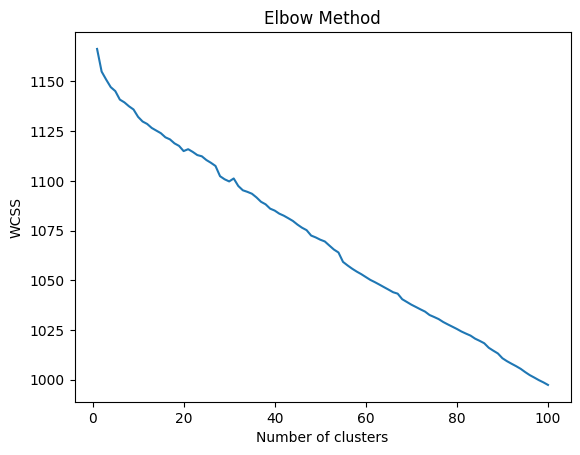

In [62]:
import matplotlib.pyplot as plt

# plot elbow method
plt.plot(range(1, 101), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
k = 20
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)


KMeans(max_iter=100, n_clusters=20, n_init=1)

In [64]:
df['cluster'] = model.labels_
df.head()

,subreddit,id,timestamp,permalink,author,tag,title,body,comments,score,cluster
0,artificial,t3_1cn1uja,1.715166e+09,/r/artificial/comments/1cn1uja/meta_being_the_...,t2_1on68pot,Discussion,Meta Being the Good Guys in AI? 🤨 About Llama ...,"Hey Reddit, \n\nI'm reading up on some of the ...",13,1,1
1,artificial,t3_1cn1gru,1.715165e+09,/r/artificial/comments/1cn1gru/will_ai_take_my...,t2_m7xm4b296,Discussion,Will ai take my job?,I work with sql and archaic Lumber industry ma...,25,6,8
2,artificial,t3_1cn153j,1.715164e+09,/r/artificial/comments/1cn153j/ai_assisted_aut...,t2_9arqi,Question,AI assisted Autotune for singing Vocals. Recom...,Does this exist?,1,0,10
5,artificial,t3_1cmwjng,1.715145e+09,/r/artificial/comments/1cmwjng/apple_is_report...,t2_cp6y4lb9r,News,Apple is reportedly developing chips to run AI...,- Apple is reportedly working on developing ch...,3,17,16
6,artificial,t3_1cmwa2q,1.715144e+09,/r/artificial/comments/1cmwa2q/top_3_ai_news_f...,t2_rel6hws9s,News,"Top 3 AI news from around the world [OpenAI, I...",1. **OpenAI** develops an **image detection to...,2,2,1


In [67]:
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print("--------------------")

Cluster centroids: 

Cluster 0:
 voice
 speech
 ai
 text
 assistant
 like
 cloned
 discussion
 using
 audio
--------------------
Cluster 1:
 ai
 model
 data
 models
 https
 com
 source
 open
 news
 llama
--------------------
Cluster 2:
 live
 word
 street
 transcribe
 shirt
 later
 whilst
 transcribing
 stop
 billionai
--------------------
Cluster 3:
 music
 audio
 ai
 songs
 udio
 suno
 art
 visual
 video
 artists
--------------------
Cluster 4:
 app
 ai
 bot
 girlfriend
 ads
 https
 want
 conversational
 looking
 www
--------------------
Cluster 5:
 facial
 amp
 ones
 recognition
 celebrity
 react
 ai
 audiobook
 long
 alike
--------------------
Cluster 6:
 gemini
 claude
 chatgpt
 gpt
 ai
 pro
 opus
 llm
 discussion
 pdf
--------------------
Cluster 7:
 ai
 microsoft
 2024
 com
 https
 news
 funding
 23
 www
 vasa
--------------------
Cluster 8:
 job
 ai
 feedback
 help
 jobs
 created
 project
 powered
 ve
 board
--------------------
Cluster 9:
 code
 poll
 reddit
 view
 ai
 https
 